In [17]:
import sys
sys.path.append('../syntheticpcfg')


In [18]:
print("hello")

hello


In [19]:
import pcfg
reload(pcfg)

<module 'pcfg' from '../syntheticpcfg/pcfg.py'>

In [20]:
pcfg1 = pcfg.load_pcfg_from_file("../data/manual/example1.pcfg")

In [21]:
import numpy.random
numpy.random.random(10)
numpy.random.seed(1)
print(numpy.random.choice(10))


5


In [22]:
sampler1 = pcfg.Sampler(pcfg1)

In [103]:
import utility
reload(utility)

<module 'utility' from '../syntheticpcfg/utility.py'>

In [90]:
s1 = utility.collect_yield(t1)

In [91]:
import inside
reload(inside)

inside1 = inside.InsideComputation(pcfg1)
print(inside1.bprod_index["A"])

inside1.inside_log_probability(s1)

<module 'inside' from '../syntheticpcfg/inside.py'>

In [94]:
import cfgfactory
reload(cfgfactory)
import cfg
reload(cfg)

<module 'cfg' from '../syntheticpcfg/cfg.pyc'>

In [95]:
factory = cfgfactory.CFGFactory()

In [96]:
import pcfgfactory
reload(cfgfactory)
reload(pcfgfactory)
reload(pcfg)
reload(inside)
reload(utility)

pcfgfactory1 = pcfgfactory.PCFGFactory()
pcfgfactory1.lexical_distribution = pcfgfactory.LexicalPitmanYor()

upcfg = pcfgfactory1.sample()

<module 'utility' from '../syntheticpcfg/utility.pyc'>

In [330]:
usampler = pcfg.Sampler(upcfg)
uinside = inside.InsideComputation(upcfg)
for i in range(10):
    tree = usampler.sample_tree()
    s = utility.collect_yield(tree)
    lp = uinside.inside_log_probability(s)
    lpd = upcfg.log_probability_derivation(tree)
    lp2 = uinside._bracketed_log_probability(tree)[upcfg.start]
    print(lp,lp2,lpd)

(-2.988883834498227, -2.988883834498227, -2.988883834498227)
(-5.263083345746802, -5.263083345746802, -5.263083345746803)
(-4.359056905719107, -4.359056905719107, -4.359056905719107)
(-3.49096584925436, -3.49096584925436, -3.49096584925436)
(-11.885904426147128, -11.885904426147128, -12.48945153766452)
(-7.726164192944869, -7.726164192944869, -7.959288799146523)
(-27.311365127366464, -30.628146107401687, -31.145362053375216)
(-17.347781355817926, -18.982215039445578, -19.24544879646559)
(-3.49096584925436, -3.49096584925436, -3.49096584925436)
(-4.1425573737484545, -4.1425573737484545, -4.1425573737484545)


In [119]:
reload(pcfg)

<module 'pcfg' from '../syntheticpcfg/pcfg.py'>

In [121]:
ml = pcfg.estimate_pcfg_from_treebank("../data/generated/example1.corpus2")


In [113]:
for i in range(1000):
    t1 = usampler.sample_tree()
    s = utility.tree_to_string(t1)
    t = utility.string_to_tree(s)
    assert(t == t1)

In [122]:
ml.store("../data/generated/example1ml.pcfg")

In [804]:
upcfg.compute_partition_function_fast()

{'NT2': 1.0,
 'NT1': 1.0,
 'S': 1.0000000000000002,
 'NT4': 1.0000000000000002,
 'NT3': 1.0}

In [805]:
upcfg.compute_partition_function_fp()

defaultdict(float,
            {'NT2': 0.9999999999999999,
             'NT4': 1.0,
             'NT3': 1.0,
             'NT1': 1.0,
             'S': 0.9999999999999996})

In [806]:
reload(utility)

upcfg.partition_nonterminals()

[('S', 'NT3', 'NT4', 'NT1', 'NT2')]

In [807]:
ipcfg = pcfg.load_pcfg_from_file("../data/manual/noninvertible_jacobian.pcfg")
ipcfg.compute_partition_function_fast()

{'S': 0.012345679012345148, 'B': 0.11111111111111063, 'A': 0.11111111111111063}

In [808]:
ipcfg.partition_nonterminals()

[('A',), ('B',), ('S',)]

In [809]:
ipcfg.renormalise()


In [810]:
ipcfg.compute_partition_function_fast()

{'S': 0.9999999999999999, 'B': 1.0, 'A': 1.0}

In [781]:
upcfg.derivational_entropy()

15.820978987845752

In [782]:
uinside = inside.InsideComputation(upcfg)
uinside.inside_bracketed_log_probability(tree)

-7.078014781663406

In [783]:
usampler = pcfg.Sampler(upcfg)
total_n = 0
n = 1000
for i in range(n):
    l = len(utility.collect_yield(usampler.sample_tree()))
    total_n += l
print( float(total_n)/n)

3.648


In [784]:
upcfg.expected_lengths()

array([[2.72950879e-04, 9.27555603e-04, 7.22168339e-02, 1.53861924e-01,
        4.90674963e-03, 1.17176290e-03, 1.92255038e-02, 1.80979938e-04,
        1.74444466e-03, 1.47369390e-02, 4.86417341e-03, 3.90919654e-03,
        7.30999653e-02, 2.09398516e-03, 5.51642597e-03, 1.06340637e-02,
        1.27011675e-01, 3.29923015e-03, 1.58317185e-03, 1.10466831e-01,
        1.52384177e-02, 1.29911730e-02, 6.60091928e-04, 1.23822087e-03,
        3.02931923e-03, 1.57836505e-03, 6.38198653e-02, 5.77213049e-04,
        1.20988110e-03, 4.03744882e-02, 2.64559838e-03, 7.65747938e-03,
        1.04147106e-02, 1.44932591e-02, 1.99032194e-03, 6.65522051e-02,
        2.47890380e-02, 4.08290826e-02, 2.43270110e-02, 3.88858830e-03,
        2.28583620e-02, 4.29713287e-02, 1.24040668e-02, 4.12938315e-03,
        4.90401642e-03, 5.61302488e-03, 7.05028222e-03, 1.02343619e-02,
        6.60553181e-03, 5.09556557e-02, 1.42379690e-04, 1.12266777e-02,
        5.80285892e-03, 1.88557715e-04, 4.54288232e-03, 3.577551

In [785]:
import inside
reload(inside)
insidec = inside.InsideComputation(upcfg)


In [786]:
el = upcfg.expected_lengths()

In [787]:
np.sum(el,axis = 1)

array([1.92593063, 1.51942623, 3.69230769, 1.77834478, 1.40690445])

In [533]:
insidec.viterbi_parse(s)

('S', ('S', ('NT2', 'kh'), ('NT2', 'ft')), ('NT1', 'jl'))

In [534]:
insidec.count_parses(s)

6

In [831]:
import fa
reload(fa)

<module 'fa' from '../syntheticpcfg/fa.py'>

In [823]:
fa1 = fa.make_prefix('dz',upcfg.terminals)

In [824]:
ipcfg = fa1.intersect(upcfg)

In [825]:
ipcfg.compute_partition_function_fast()[ipcfg.start]

0.06443383343678738

In [832]:
fa2 = fa.make_infixd('dz',upcfg.terminals)

In [827]:
jpcfg = fa2.intersect(upcfg)

In [828]:
jpcfg.compute_partition_function_fast()

{(1, 'NT4', 1): 0.9999999999999999,
 (0, 'NT3', 1): 0.013327407346904773,
 (0, 'NT2', 0): 1.0,
 (0, 'NT1', 1): 0.0032879958422695615,
 (1, 'NT1', 1): 1.0000000000000002,
 (1, 'NT2', 1): 0.9999999999999998,
 (0, 'NT1', 0): 1.0,
 (0, 'NT2', 1): 0.0034643144140120478,
 (0, 'NT4', 1): 0.007698180224291189,
 (0, 'S', 1): 0.115916268264179,
 (1, 'S', 1): 0.9999999999999998,
 (0, 'NT4', 0): 1.0,
 (0, 'S', 0): 0.9999999999999997,
 (0, 'NT3', 0): 1.0,
 (1, 'NT3', 1): 1.0000000000000002}

In [830]:
jpcfg.terminal_expectations()['dz']

0.35534923267892304

In [833]:
kpcfg = fa2.intersect(upcfg)

In [834]:
kpcfg.compute_partition_function_fast()

{(1, 'NT4', 1): 0.9999999999999999,
 (0, 'NT3', 1): 0.012720251177069705,
 (0, 'NT2', 0): 0.9967293517407156,
 (0, 'NT1', 1): 0.0031319801739356475,
 (1, 'NT1', 1): 1.0000000000000002,
 (1, 'NT2', 1): 0.9999999999999998,
 (0, 'NT1', 0): 0.9968680198260644,
 (0, 'NT2', 1): 0.003270648259284358,
 (0, 'NT4', 1): 0.0073476981118199254,
 (0, 'S', 1): 0.11138366260352806,
 (1, 'S', 1): 0.9999999999999998,
 (0, 'NT4', 0): 0.9926523018881801,
 (0, 'S', 0): 0.8886163373964715,
 (0, 'NT3', 0): 0.9872797488229302,
 (1, 'NT3', 1): 1.0000000000000002}

In [126]:
# pitmanyor plotting
import matplotlib.pyplot as plt


In [127]:
%matplotlib inline

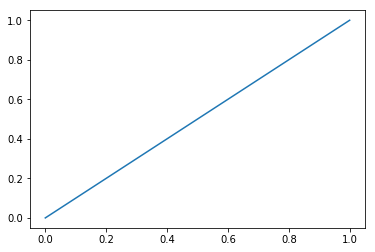

In [128]:
plt.plot([0,1],[0,1])

In [132]:
reload(pcfgfactory)

<module 'pcfgfactory' from '../syntheticpcfg/pcfgfactory.py'>

In [133]:
ld = pcfgfactory.LengthDistribution()

In [320]:
r = 10
p = 0.5
ld.ztnb(r,p, 20)

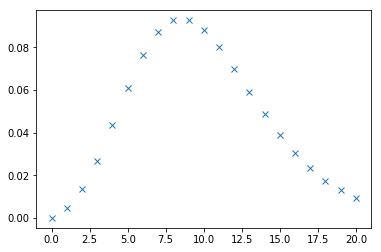

In [321]:
plt.plot(range(21),ld.weights,'x')

In [153]:
lexd = pcfgfactory.LexicalPitmanYor(d=0.9,alpha=1.0)

In [308]:

n= 5000
data = lexd.sample(n)
import numpy as np

x = np.arange(1,n+1)
x  = x.reshape(-1,1)
print(x)
x = np.log(x)
print(x)

[[   1]
 [   2]
 [   3]
 ...
 [4998]
 [4999]
 [5000]]
[[0.        ]
 [0.69314718]
 [1.09861229]
 ...
 [8.51679311]
 [8.51699317]
 [8.51719319]]


In [309]:
lexd = pcfgfactory.LexicalPitmanYor(d=0.85,alpha=1)
y = lexd.sample(n)
y = np.log(y)

In [310]:
from sklearn import  linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
print(regr.coef_,regr.intercept_)

(array([-1.19582864]), -1.8499668888444027)


In [312]:
pred = regr.predict(x)

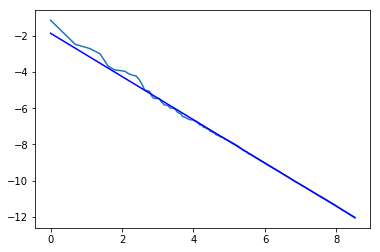

In [313]:
plt.plot(x,y)
plt.plot(x, pred, 'b')
# plt.xscale('log')
# plt.yscale('log')

In [306]:
len(y)

5000

In [307]:
print(y)

[ -2.50247897  -2.63067364  -2.96904203 ... -11.90004966 -11.90023684
 -11.90040024]


In [333]:
# estimate conditional entropy H(tree|string)
# will be a measure of ambiguity.
# sample n trees 
reload(pcfg)


<module 'pcfg' from '../syntheticpcfg/pcfg.py'>

In [334]:
pcfg.estimate_ambiguity(upcfg)

2.789340997259438

In [335]:
pcfg.estimate_ambiguity(upcfg)

2.6100934986825606

In [412]:
import uniformsampler
reload(uniformsampler)

<module 'uniformsampler' from '../syntheticpcfg/uniformsampler.py'>

In [413]:
sigma = pcfg.load_pcfg_from_file("../data/manual/sigmastar.pcfg")

In [414]:
us = uniformsampler.UniformSampler(upcfg,10)

In [415]:
us.index['S']

array([0.00000000e+00, 1.80000000e+01, 1.88600000e+03, 5.83878000e+05,
       2.36673454e+08, 1.08485212e+11, 5.36219024e+13, 2.78653453e+16,
       1.50077005e+19, 8.30228052e+21, 4.68944779e+24])

In [416]:
us.sample(3)

('S', ('NT2', 'vh'), ('NT3', ('S', 'fp'), ('NT3', 'qc')))

In [417]:
us.density(10)

1660126.9700687726

In [418]:
us.string_density(7,100)

1.0796549991774635

In [419]:
us.string_density_crude(7,100)

1.0

In [420]:
max_length = 20
n_samples = 1000
us = uniformsampler.UniformSampler(upcfg,max_length)
x = []
yc = []
y = []
for l in range(1,max_length+1):
    print(l)
    x.append(l)
    y.append(us.string_density(l,n_samples))
    yc.append(us.string_density_crude(l,n_samples))


1


KeyError: (0, 'S', 1)

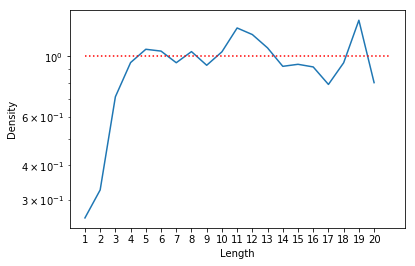

In [403]:
plt.plot(x,y)
plt.plot([1,max_length+1],[1.0,1.0],'r:')
plt.xlabel("Length")
plt.ylabel('Density')
plt.yscale('log')
plt.xticks(range(1,max_length+1))
plt.show()